In [1]:
import numpy as np
from time import perf_counter

import matplotlib.pyplot as plt 
import networkx as nx
import random
import warnings

#### Cheatsheet
numpy.linalg.solve - Solve a linear matrix equation, or system of linear scalar equations    
numpy.linalg.lstsq - Solves the equation a x = b by computing a vector x that minimizes the squared Euclidean 2-norm  
scipy.linalg.lu - Compute pivoted LU decompostion of a matrix. The decomposition is: A = P L U  
np.allclose(np.dot(a, x), b) - Check that the solution is correct  

In [541]:
def createLinEqs(n):
    A = np.random.randint(low=1,high=1000,size=(n,n))
    W = np.random.randint(low=1,high=100,size=n)
    A = A.astype(float)
    W = W.astype(float)
    return (A,W)

In [542]:
def gauss(M,W,n):
    for i in range (n):
        scale = max(abs(M[i]))
        M[i] /= scale
        W[i] /= scale
        w = M[i][i] 
        M[i] = M[i]/w #i-ty wiersz dzielimy przez aii
        W[i] = W[i]/w #by wiersz był postaci np: dla i=1 [1,a12,a13,..,a1n][b1]
        for j in range (n):
            if(i != j): #wszystkie wiersze poza i-tym
                w = M[j][i] # wspolczynnik aji
                M[j] = M[j] - M[i]*w #odejmujemy od j-tego wiersza, wiersz i-ty przemnożony przezwspółczynnik aji
                W[j] = W[j] - W[i]*w #by wiersz j miał postać np: dla i=1 j=2 [0,a21,a22,..,a2n][b2]
    
    #po wykonaniu wszystkich powyższych operacji macierze A i W są postaci:
    # [1,0,0] [x1]
    # [0,1,0] [x2]
    # [0,0,1] [x3]

    return W

In [543]:
n=5
A = np.random.randint(low=1,high=10,size=(n,n))
W = np.random.randint(100,size=n)
A = A.astype(float)
W = W.astype(float)
print("Gauss",gauss(A,W,n))
print("Linalg",np.linalg.solve(A,W))

Gauss [-243.41304348  -49.30163043  141.12228261   31.38858696  -18.99184783]
Linalg [-243.41304348  -49.30163043  141.12228261   31.38858696  -18.99184783]


In [544]:
def gaussPivoting(M,W,n): 
    for i in range(n):   
        for j in range(i+1,n):
            if abs(M[j][i]) > abs(M[i][i]):  #znajdujemy wiersz ktory ma wieksza wartosc w danej kolumnie
                M[[i, j]] = M[[j, i]] #zamieniamy miejscem rzędy i,j
                
    for i in range (n):
        scale = max(abs(M[i]))
        M[i] /= scale
        W[i] /= scale
        w = M[i][i] 
        M[i] = M[i]/w 
        W[i] = W[i]/w 
        for j in range (n):
            if(i != j): 
                w = M[j][i] 
                M[j] = M[j] - M[i]*w 
                W[j] = W[j] - W[i]*w 
    
    return W

In [545]:
n=5
A = np.random.randint(low=1,high=10,size=(n,n))
W = np.random.randint(100,size=n)
A = A.astype(float)
W = W.astype(float)
print("Gauss z pivotem",gaussPivoting(A,W,n))
print("Linalg",np.linalg.solve(A,W))

Gauss z pivotem [ 194.13114754  -86.22540984 -290.05737705  236.6352459    18.47540984]
Linalg [ 194.13114754  -86.22540984 -290.05737705  236.6352459    18.47540984]


In [547]:
def measureTime(matrixSize):
    (A,W) = createLinEqs(matrixSize)
    
    start = perf_counter()
    gauss(A,W,matrixSize)
    end = perf_counter()
    guassTime = end - start
    
    start = perf_counter()
    np.linalg.solve(A,W)
    end = perf_counter()
    linalgTime = end - start
    
    return (guassTime,linalgTime)

In [548]:
print(measureTime(500))
print(measureTime(1000))

(1.4676648000004207, 0.003934600001230137)
(5.402454799999759, 0.017745400000421796)


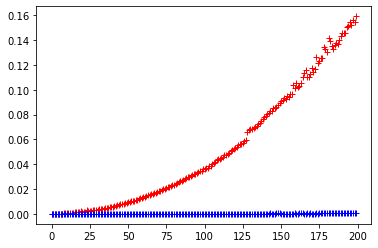

In [554]:
timeGauss = []
timeNP = []
for i in range (200):
    t1,t2 = measureTime(i)
    timeGauss.append(t1)
    timeNP.append(t2)

plt.plot(timeGauss,'r+')
plt.plot(timeNP,'b+')
plt.show()

In [13]:
n=3
A = np.random.randint(low=1,high=10,size=(n,n))
A = A.astype(float)
A

array([[4., 7., 2.],
       [5., 2., 2.],
       [5., 5., 7.]])

In [14]:
def LUDecomposition(M,n):
    L = [[0 for x in range(n)] for y in range(n)]; 
    U = [[0 for x in range(n)] for y in range(n)];                
    for i in range(n): 
        for j in range(i, n):  #górny trójkąt
            sum = 0
            for k in range(i): 
                sum += (L[i][k] * U[k][j])  #suma L(i, k) * U(k, j) 
            U[i][j] = M[i][j] - sum 

        for j in range(i, n): #dolny trójkąt
            L[i][i] = 1 #przekątna = 1
            if (i != j): 
                sum = 0 
                for k in range(i): 
                    sum += (L[j][k] * U[k][i]);  #suma L(j, k) * U(k, i) 
                L[j][i] = (M[j][i] - sum) / U[i][i]
    return (L,U)

In [15]:
n=3
A = np.random.randint(low=1,high=10,size=(n,n))
A = A.astype(float)

L,U = LUDecomposition(A,n)
    
print("Dolny trójkąt")
for i in range (n):
    print(L[i])
    
print("Górny trójkąt")
for i in range (n):
    print (U[i])

print("Macierz Wejściowa")
for i in range (n):
    print (A[i])
    
np.matmul(L,U)

Dolny trójkąt
[1, 0, 0]
[1.75, 1, 0]
[1.0, 2.0, 1]
Górny trójkąt
[4.0, 4.0, 2.0]
[0, 1.0, -1.5]
[0, 0, 8.0]
Macierz Wejściowa
[4. 4. 2.]
[7. 8. 2.]
[4. 6. 7.]


array([[4., 4., 2.],
       [7., 8., 2.],
       [4., 6., 7.]])

### Zadanie 3 
- Wczytuje z pliku listę krawędzi grafu opisującego obwód elektryczny. Wagi krawędzi określają opór fragmentu obwodu między dwoma węzłami. Wierzchołki grafu identyfikowane są przez liczby naturalne.  
- Wczytuje dodatkowo trójkę liczb (s, t, E), przy czym para (s, t) wskazuje między którymi węzłami sieci przyłożono siłę elektromotoryczną E. Opór wewnętrzny SEM można zaniedbać.
- Wykorzystując prawa Kirchhoffa znajduje natężenia prądu w każdej części obwodu i przedstawia je na rysunku w postaci grafu ważonego z etykietami.  
- Wykorzystująć metodę potencjałów węzłowych zaimplementuj alternatywne rozwiązanie problemu.
- Przedstaw (wizualizacja + sprawdzenie poprawności wyników) działanie programu dla grafów spójnych mających od 15 do 100 wierzchołków:   
– Spójny graf losowy  
– Graf 3-regularny (kubiczny)  
– Graf złożony z dwóch grafów losowych połaczonych mostkiem  
– Graf siatka 2D  

In [2]:
epsI = 1e-8
epsU = 1e-8

In [3]:
def Kirchoff(G, s, t, E):
    
    if not nx.is_weakly_connected(G): #czy graf jest spójny
        raise Exception('Graf nie jest spójny')

    if s == t:
        raise Exception('Zmienne s i t nie moga byc jednym wierzcholkiem')
        
     
    if s not in G.nodes() or t not in G.nodes(): #istnieja wierzcholki miedzy ktorymi przylozony jest E
        raise Exception('Zmienne s i t są niepoprawne')

    G.add_edge(s, t, R = 0) #tworzymy krawedz miedzy s i t

    # macierze
    n = G.number_of_edges()
    M = np.zeros((n, n)) 
    W = np.zeros(n)
    
    #pomocnicze
    edges = list(G.edges()) #lista krawedzi np. [(0, 1), (0, 2), (1, 2)]
    cycles = nx.cycle_basis(G.to_undirected()) #bierzemy wszystkie cykle
    for cycle in cycles: #dodanie pierwszego elementu na koniec cyklu
        cycle.append(cycle[0]) #zeby mozna bylo wziac wszystkie pary wierzcholkow w cyklu
    cyclesCount = len(cycles) 

    #pierwsza czesc macierzy
    #II prawo kirchhoffa 
    for i, cycle in enumerate(cycles):
        for j in range (len(cycle) - 1):
            pair = (cycle[j],cycle[j+1])
            if  pair == (s, t):
                W[i] = E
            elif pair == (t, s):
                W[i] = -E
            else:
                (u, v) = pair
                if (u, v) in edges:
                    j = edges.index((u, v))
                    M[i][j] = G[u][v]['R']
                elif (v, u) in edges: 
                    j = edges.index((v, u))
                    M[i][j] = -G[v][u]['R']

    
    #druga czesc macierzy
    #wypelnienie I prawem kirchoffa jezeli cykle nie daly nam wystarczajaco rownan
    #I prawo kirchhoffa 
    for i, vertex in enumerate(G.nodes()):
        if cyclesCount + i < len(edges): #jezeli brakuje nam rownan
            for (u, v) in G.out_edges(vertex): #wszystkie 'wychodzące' z danego wierzchołka
                j = edges.index((u, v))
                M[cyclesCount+i,j] = -1
            for (u, v) in G.in_edges(vertex): #wszystkie 'wchodzace' do danego wierzchołka
                j = edges.index((u, v))
                M[cyclesCount+i,j] = 1
        else: break 

    #czy macierz ma rozwiazanie
    if np.linalg.matrix_rank(M) !=  n: #liczba niewiadomych = rzad macierzy wyzancznikow
        raise Exception("Macierz nie ma jednoznacznego rozwiazania")

    # rozwiazanie ukladu
    I = np.linalg.solve(M, W)
    maxI = max(I)

    # dodać 'I' do grafu i sprawdzic czy zalozylismy dobry kierunek
    for i, (u, v) in enumerate(G.copy().edges()): #na kopii bo modyfikujemy główny graf
        if I[i] < 0: #odwrocic kierunek jezeli wyszlo ujemnie
            I[i] = -I[i]
            tmp = G.edges[(u, v)]['R'] 
            G.remove_edge(u, v)
            G.add_edge(v, u, R = tmp)
            (u, v) = (v, u)
        G.edges[(u, v)]['I'] = I[i]
    
    # czy spełnia II prawo Kirchhoffa
    for i, cycle in enumerate(cycles):
        U = 0
        for i in range  (len(cycle) - 1):
            pair = (cycle[i],cycle[i+1])
            if pair == (s, t):
                U += E
            elif pair == (t, s):
                U -= E
            else:
                (u, v) = pair
                if (u, v) in G.edges():
                    U = U - G.edges[(u, v)]['R'] * G.edges[(u, v)]['I']
                elif (v, u) in edges:
                    U = U + G.edges[(v, u)]['R'] * G.edges[(v, u)]['I']
        if U > epsU :
            raise Exception("Nie spełnia II prawa Kirchhoffa")
    
    # czy spełnia I prawo Kirchhoffa
    for x in G.nodes():
        I = 0
        for e in G.in_edges(x):
            I += G.edges[e]['I']
        for e in G.out_edges(x):
            I -= G.edges[e]['I']
        if I > epsI :
            raise Exception("Nie spełnia I prawa Kirchhoffa")
            
    return G,maxI

In [4]:
def drawGraph(G,maxI,pos):
    
    colorMap = plt.cm.cividis
    plotDPI = 600
    
    edgeArrowSize = 20
    edgeTextSize = 10
    
    vertexSize = 150
    vertexTextSize = 10
    
    
    nx.draw_networkx_nodes(G, pos, node_color = 'orange', node_size = vertexSize)
    nx.draw_networkx_labels(G, pos, font_size = vertexTextSize)

    colors = [I for _,I in nx.get_edge_attributes(G,'I').items()]
    nx.draw_networkx_edges(G, pos, edge_color=colors/maxI, edge_cmap=colorMap,
                           edge_vmin=0, edge_vmax=1, arrowsize=edgeArrowSize, node_size=vertexSize)

    
    edgeLabels = {e:'%.2f' %I for e,I in nx.get_edge_attributes(G,'I').items()}   
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edgeLabels, font_size = edgeTextSize)

    cm = plt.cm.ScalarMappable(cmap=colorMap , norm=plt.Normalize(0,maxI))
    plt.colorbar(cm)
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    
    plt.show()

D:\Users\marys\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
D:\Users\marys\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
D:\Users\marys\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
D:\Users\marys\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


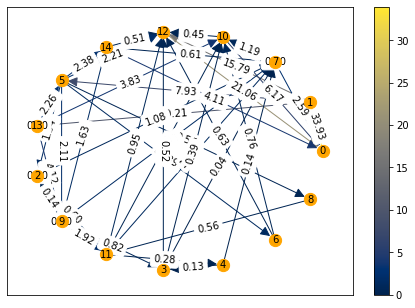

In [5]:
n = 15
G = nx.DiGraph()
for u in range(n):
    for v in range(u, n):
        if random.random() < 0.3: #robimy krawedz jezeli los nam tak powie
            G.add_edge(u, v, R = random.randint(1, 10))

s = 0
t = 1
E = 100
G,maxI = Kirchoff(G, s, t, E)
pos = nx.circular_layout(G)
drawGraph(G,maxI,pos)

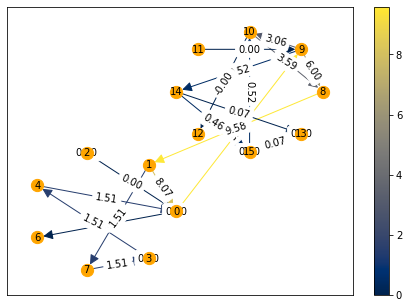

In [7]:
n = 8
G1 = nx.DiGraph()
G2 = nx.DiGraph()
for u in range(n):
    for v in range(u, n):
        if random.random() < 0.3: 
            G1.add_edge(u, v, R = random.randint(1, 10))
        if random.random() < 0.3: 
            G2.add_edge(u+n, v+n, R = random.randint(1, 10))
            
G = nx.compose(G1,G2)
G.add_edge(n,1,R=1)

pos1 = nx.shell_layout(G1)
pos2 = nx.shell_layout(G2)
pos2_new = {k: [xy[0]+2, xy[1]+2] for k, xy in pos2.items()}
pos = {**pos1, **pos2_new} 

s = 0
t = n+1
E = 100

G,maxI = Kirchoff(G, s, t, E)
drawGraph(G,maxI,pos)

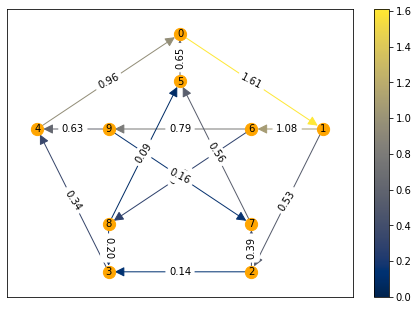

In [8]:
G = nx.DiGraph()
for u, v in nx.petersen_graph().edges():
    G.add_edge(u, v, R=random.randint(0,10))

s = 0
t = 1
E = 10

pos = {0:[0,2], 1:[2,0], 2:[1,-3],3:[-1,-3], 4:[-2,0], 5:[0,1], 6:[1,0], 7:[1,-2], 8:[-1,-2],9:[-1,0]} 

G,maxI = Kirchoff(G, s, t, E)
drawGraph(G,maxI,pos)

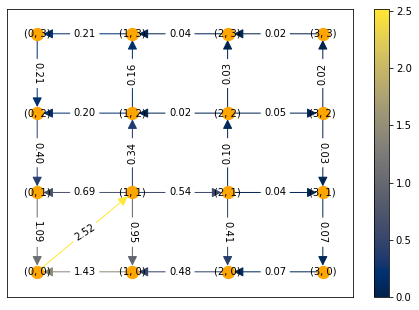

In [583]:
n = 4
G = nx.DiGraph()
for u, v in nx.grid_2d_graph(n, n).edges():
    G.add_edge(u, v, R=random.randint(0,10))

pos = {(i, j): [i, j] for i in range(n) for j in range(n)}

s = (0, 0)
t = (1, 1)
E = 10

G,maxI = Kirchoff(G, s, t, E)

drawGraph(G,maxI,pos)